<a href="https://colab.research.google.com/github/anshika0601/ml-learn/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Random Forest Accuracy: 0.7762237762237763


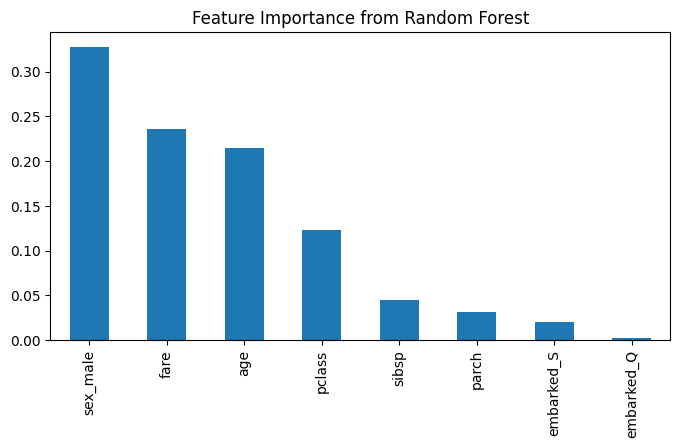

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load Titanic dataset (from seaborn or CSV)
import seaborn as sns
titanic = sns.load_dataset("titanic")

# Select features and target
features = ["pclass", "sex", "age", "fare", "sibsp", "parch", "embarked"]
df = titanic[features + ["survived"]].dropna()

# Encode categorical features
df = pd.get_dummies(df, columns=["sex", "embarked"], drop_first=True)

X = df.drop("survived", axis=1)
y = df["survived"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Initialize Random Forest
rf = RandomForestClassifier(
    n_estimators=100,   # number of trees
    max_depth=None,     # let trees grow until fully split
    min_samples_leaf=2, # minimum samples per leaf
    random_state=42
)

# Fit model
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Accuracy
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))


# Extract feature importance
importances = rf.feature_importances_
feat_importances = pd.Series(importances, index=X.columns)

# Sort and plot
feat_importances.sort_values(ascending=False).plot(kind="bar", figsize=(8,4))
plt.title("Feature Importance from Random Forest")
plt.show()
